In [1]:
!pip install virtualenv
!mkdir my_virtualenv
%cd my_virtualenv
!virtualenv my_env
!source my_env/bin/activate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 17.2 MB/s eta 0:00:00
/content/my_virtualenv
created virtual environment CPython3.10.12.final.0-64 in 1054ms
  creator CPython3Posix(dest=/content/my_virtualenv/my_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.1.0, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [1]:
import pickle
import numpy as np
with open('/content/train_qa.txt','rb') as f:
  train_data = pickle.load(f)
# /content/sample_data/train_qa.txt

In [2]:
with open('/content/test_qa.txt','rb') as f:
  test_data = pickle.load(f)

In [3]:
type(test_data),type(train_data)

(list, list)

In [4]:
len(train_data),len(test_data)

(10000, 1000)

In [5]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [6]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [7]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [8]:
''.join(train_data[0][2])

'no'

In [9]:
all_data = train_data + test_data

In [10]:
all_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [11]:
len(all_data)

11000

In [12]:
vocab = set()
for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [13]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went'}

In [14]:
vocab.add('no')


vocab.add('yes')

In [15]:
vocab_len = len(vocab) + 1

In [16]:
all_story_len = [len(data[0]) for data in all_data]

In [17]:
len(all_data[1][0])

26

In [18]:
all_story_len

[12,
 26,
 39,
 52,
 64,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 38,
 50,
 63,
 13,
 25,
 37,
 49,
 61,
 24,
 37,
 48,
 71,
 83,
 13,
 25,
 37,
 50,
 62,
 12,
 24,
 35,
 46,
 71,
 12,
 24,
 37,
 50,
 62,
 13,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 39,
 50,
 62,
 13,
 26,
 38,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 62,
 13,
 25,
 38,
 52,
 65,
 12,
 24,
 37,
 48,
 61,
 13,
 25,
 38,
 51,
 64,
 12,
 25,
 39,
 53,
 65,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 25,
 37,
 49,
 60,
 72,
 13,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 12,
 23,
 36,
 47,
 59,
 12,
 24,
 35,
 48,
 61,
 12,
 23,
 36,
 49,
 62,
 12,
 25,
 37,
 48,
 59,
 12,
 25,
 37,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 61,
 12,
 24,
 35,
 48,
 61,
 12,
 25,
 37,
 49,
 62,
 12,
 24,
 38,
 50,
 62,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 60,


In [19]:
max_story_len = max(all_story_len)

In [20]:
max_story_len

156

In [21]:
all_question_len = [len(data[1]) for data in all_data]

In [22]:
max_question_len = max(all_question_len)
max_question_len

6

In [23]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(filters=[]) # we do not want the text to be cleaned of punctuations
tokenizer.fit_on_texts(vocab)

In [25]:
tokenizer.word_index #maps every word in the vocabulary to an index number

{'to': 1,
 'sandra': 2,
 'there': 3,
 'took': 4,
 'bathroom': 5,
 'football': 6,
 'in': 7,
 'got': 8,
 'back': 9,
 'discarded': 10,
 'bedroom': 11,
 '.': 12,
 'office': 13,
 'journeyed': 14,
 'is': 15,
 'dropped': 16,
 'the': 17,
 'daniel': 18,
 'yes': 19,
 'put': 20,
 'mary': 21,
 'moved': 22,
 'went': 23,
 'left': 24,
 '?': 25,
 'no': 26,
 'up': 27,
 'grabbed': 28,
 'milk': 29,
 'kitchen': 30,
 'apple': 31,
 'john': 32,
 'hallway': 33,
 'down': 34,
 'picked': 35,
 'travelled': 36,
 'garden': 37}

In [26]:
train_story_text = []
train_question_text = []
train_answer_text = []

In [27]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answer_text.append(answer)

In [28]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [29]:
train_question_text[0]

['Is', 'Sandra', 'in', 'the', 'hallway', '?']

In [30]:
train_answer_text[0]

'no'

In [31]:
train_story_sequence = tokenizer.texts_to_sequences(train_story_text)

In [32]:
len(train_story_sequence)

10000

In [33]:
train_story_sequence[0]

[21, 22, 1, 17, 5, 12, 2, 14, 1, 17, 11, 12]

In [34]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [35]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len = max_question_len ):
  #story
  X = []
  #question
  Xq = []
  #Answer
  Y = []
  for story,question,answer in data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in question]
    y = np.zeros(len(word_index )+ 1)
    y[word_index[answer]] = 1
    #
    X.append(x)
    #
    Xq.append(xq)
    #
    Y.append(y)
  return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [36]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [37]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [38]:
answers_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [39]:
inputs_train[0],inputs_train[1000]

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 21, 22,  1, 17,  5, 12,  2, 14,  1,
        17, 11, 12], dtype=int32),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [40]:
tokenizer.word_index['yes']

19

In [41]:
tokenizer.word_index['no']

26

In [42]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,
         0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [43]:
from keras.models import Sequential,Model
# from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [44]:
from keras.layers import Embedding


In [45]:
##Place Holder - Input Stories --> shape -->(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [46]:
vocab_size = len(vocab) + 1

In [47]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3)) # helps in reducing overfitting
#OUTPUT :-->(samples,story_maxlen,embedding_dimensions,)

In [48]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3)) # helps in reducing overfitting
# OUTPUT :-->(samples,story_maxlen,max_question_len)

In [49]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3)) # helps in reducing overfitting
# OUTPUT :-->(samples,question_maxlen,emdedding_dimensions)

In [50]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [51]:
print(input_encoded_m.shape)
print(question_encoded.shape)

(None, 156, 64)
(None, 6, 64)


In [52]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [53]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [54]:
answer = concatenate([response,question_encoded])

In [55]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [56]:
answer.shape

TensorShape([None, 6, 220])

In [57]:
from tensorflow import keras
from keras.layers import LSTM, Dropout

In [58]:
# answer = keras.layers.Reshape((1, 38))(answer)

In [59]:
answer = LSTM(units=32)(answer)

In [60]:
answer = Dropout(0.5)(answer) #(samples,vocab_size) #YES/NO 0/1


In [61]:
answer = Dense(vocab_size)(answer)

In [62]:
answer = Activation('softmax')(answer)

In [63]:
answer

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'activation_1')>

In [64]:
model = Model([input_sequence,question],answer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [67]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=100,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6967 - accuracy: 0.4995 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6956 - accuracy: 0.5065 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6964 - accuracy: 0.4970 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6960 - accuracy: 0.4927 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6955 - accuracy: 0.5019 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6968 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6955 - accuracy: 0.5032 - val_loss: 0.6933 - val_accuracy: 0.4970

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


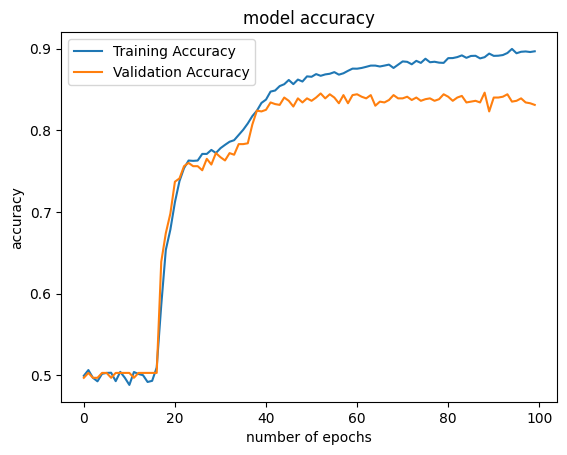

In [69]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('model accuracy')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


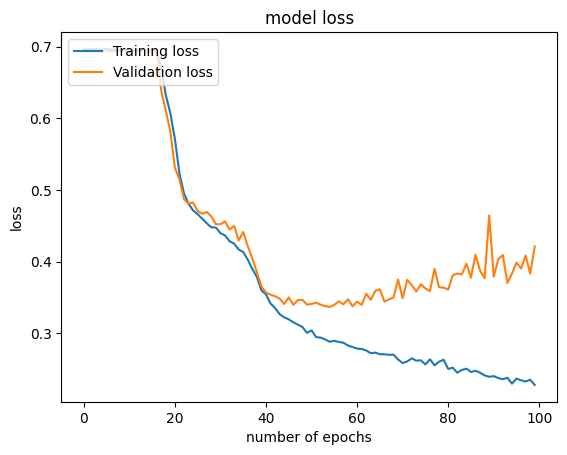

In [70]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('model loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

In [71]:
model.save('chatbotmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
pred_result = model.predict(([inputs_test, queries_test]))
pred_result.shape

32/32 [==============================] - 1s 3ms/step


(1000, 38)

In [73]:
pred_result[0]

array([2.7618854e-16, 2.8257427e-16, 4.3248150e-16, 3.8997892e-16,
       3.5586903e-16, 3.1097520e-16, 2.9378930e-16, 4.3711064e-16,
       4.1628800e-16, 4.2109870e-16, 2.6184343e-16, 2.3497922e-16,
       2.6062963e-16, 2.7160495e-16, 2.9054048e-16, 3.1496272e-16,
       3.3936020e-16, 2.2570418e-16, 3.0656653e-16, 8.4198001e-07,
       3.7535392e-16, 2.2698381e-16, 4.4615211e-16, 2.9594106e-16,
       3.0751642e-16, 2.4335275e-16, 9.9999917e-01, 2.8848960e-16,
       3.6960788e-16, 3.6404012e-16, 1.9231557e-16, 1.8076029e-16,
       3.3654721e-16, 3.1714737e-16, 2.0760824e-16, 3.9024380e-16,
       2.8879790e-16, 2.8551281e-16], dtype=float32)

In [74]:
index_word = {index: word for word, index in tokenizer.word_index.items()}

In [75]:
predictions = np.argmax(pred_result, axis=1)
pred_answers = [index_word[pred] for pred in predictions]
pred_answers[:10]

['no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes']

In [76]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [77]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [78]:
# The answer should be 'yes'.
mydata = [(my_story.split(), my_question.split(), 'yes')]

In [79]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [80]:
pred_result = model.predict([my_story, my_ques])

1/1 [==============================] - 0s 59ms/step


In [81]:
val_max = np.argmax(pred_result[0])

In [ ]:
# Get the answer corresponding to the highest predict probabilty.
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
k

In [83]:
pred_result[0][val_max]

0.9966454